In [70]:
import pandas as pd
from sklearn.datasets import load_iris
g=load_iris()
dir(g)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [71]:
df=pd.DataFrame(g.data,columns=g.feature_names)

In [72]:
g.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [73]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
fg=pd.DataFrame(g.target,columns=["type"])

In [75]:
fg

,type
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [76]:
gh=fg.apply(lambda x:g.target_names[x])
print(gh)

          type
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]


In [77]:
new_df=pd.concat([df,gh],axis=1)

In [78]:
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [79]:
fqg=new_df.groupby("type")

In [80]:
setosa=fqg.get_group("setosa").drop("type",axis=1)

In [81]:
virgnica=fqg.get_group("virginica").drop("type",axis=1)

In [82]:
versicolor=fqg.get_group("versicolor").drop("type",axis=1)

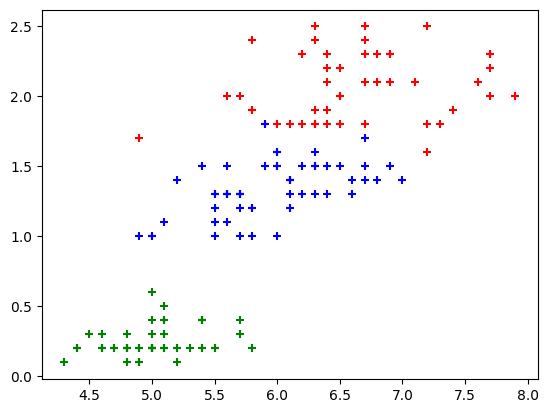

In [91]:
import matplotlib.pyplot as plt
plt.scatter(setosa["sepal length (cm)"],setosa["petal width (cm)"],marker="+",color="green")
plt.scatter(virgnica["sepal length (cm)"],virgnica["petal width (cm)"],marker="+",color="red")
plt.scatter(versicolor["sepal length (cm)"],versicolor["petal width (cm)"],marker="+",color="blue")
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(new_df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]],fg.type,test_size=0.2,random_state=7)

In [85]:
from sklearn.svm import SVC
p=SVC()
p.fit(x_train,y_train)
p.score(x_test,y_test)

0.8666666666666667

In [86]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
126,6.2,2.8,4.8,1.8
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3
...,...,...,...,...
142,5.8,2.7,5.1,1.9
92,5.8,2.6,4.0,1.2
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0


In [87]:
print(type(fg))

<class 'pandas.core.frame.DataFrame'>


In [88]:
p.predict([[5,2,1,0.4]])

C:\Users\lenin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [89]:
type([[1,2,3,4]])

list

In [90]:
y_train

126    2
79     1
22     0
139    2
74     1
      ..
142    2
92     1
103    2
67     1
25     0
Name: type, Length: 120, dtype: int32

In [92]:
y_pred=p.predict(x_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix
ddg=classification_report(y_test,y_pred)
print(ddg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



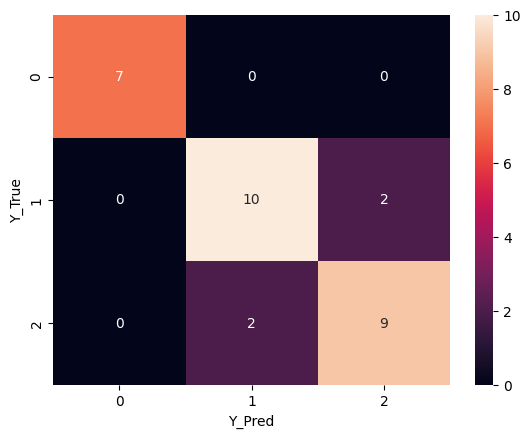

In [96]:
import seaborn as sn
cv=confusion_matrix(y_test,y_pred)
sn.heatmap(cv,annot=True,fmt="d")
plt.xlabel("Y_Pred")
plt.ylabel("Y_True")
plt.show()